<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

# Machine Learning Foundation

## Course 3, Part e: Bagging DEMO

Estimated time needed: **45** minutes

## Objectives

After completing this demo you will be able to:

*   Understand what Bagging is
*   Recognize that Random Forests is an implementation of bagging and its abilities
*   Describe the advantages of Random Forests over simply adding extra Decision Trees


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#Setup">Part 1: Setup</a></li>
        <li><a href="https://#TargPreproc">Part 2: Examining the Target and Preprocessing</a></li>
        <li><a href="https://#OOB">Part 3: Random Forest and Out-of-bag Error</a></li>
        <li><a href="https://#ExtraTrees">Part 4: Extra Trees</a></li>
        <li><a href="https://#results">Part 5: Gathering Results</a></li>
        <li><a href="https://#examineRes">Part 6: Examining Results</a></li>
</div>
<br>
<hr>


## Introduction

We will be using the customer churn data from the telecom industry that we used in the KNN Lab. Since we preprocessed the data there, we will import the preprocessed data, which is in a file called: 'churndata_processed.csv'


In [ ]:
!pip install -U scikit-learn

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

<h2 id = "Setup"> Part 1: Setup </h2>

*   The raw churndata has been setup as a variable 'churndata', and we have imported it above.
*   We will rely on the data preprocessing from the KNN lab, which is captured in the file 'churndata_processed.csv'
*   First, import that file and examine its contents.
*   Output summary statistics and check variable data types
*   Using Seaborn, plot a heatmap of variable correlations


In [4]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/churndata_processed.csv")

In [5]:
data.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [6]:
round(data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.43,0.40,0.0,0.00,0.25,0.75,1.0
multiple,7043.0,0.42,0.49,0.0,0.00,0.00,1.00,1.0
gb_mon,7043.0,0.24,0.24,0.0,0.04,0.20,0.32,1.0
security,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
backup,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
protection,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
support,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
unlimited,7043.0,0.67,0.47,0.0,0.00,1.00,1.00,1.0
contract,7043.0,0.38,0.42,0.0,0.00,0.00,1.00,1.0
paperless,7043.0,0.59,0.49,0.0,0.00,1.00,1.00,1.0


In [7]:
data.dtypes

months                       float64
multiple                       int64
gb_mon                       float64
security                       int64
backup                         int64
protection                     int64
support                        int64
unlimited                      int64
contract                     float64
paperless                      int64
monthly                      float64
satisfaction                 float64
churn_value                    int64
payment_Credit Card            int64
payment_Mailed Check           int64
internet_type_DSL              int64
internet_type_Fiber Optic      int64
internet_type_None             int64
offer_Offer A                  int64
offer_Offer B                  int64
offer_Offer C                  int64
offer_Offer D                  int64
offer_Offer E                  int64
dtype: object

Let's plot a heatmap to examine feature correlations. Very light cells indicate high positive correlation, while very dark cells indicate high negative correlation.


<Axes: >

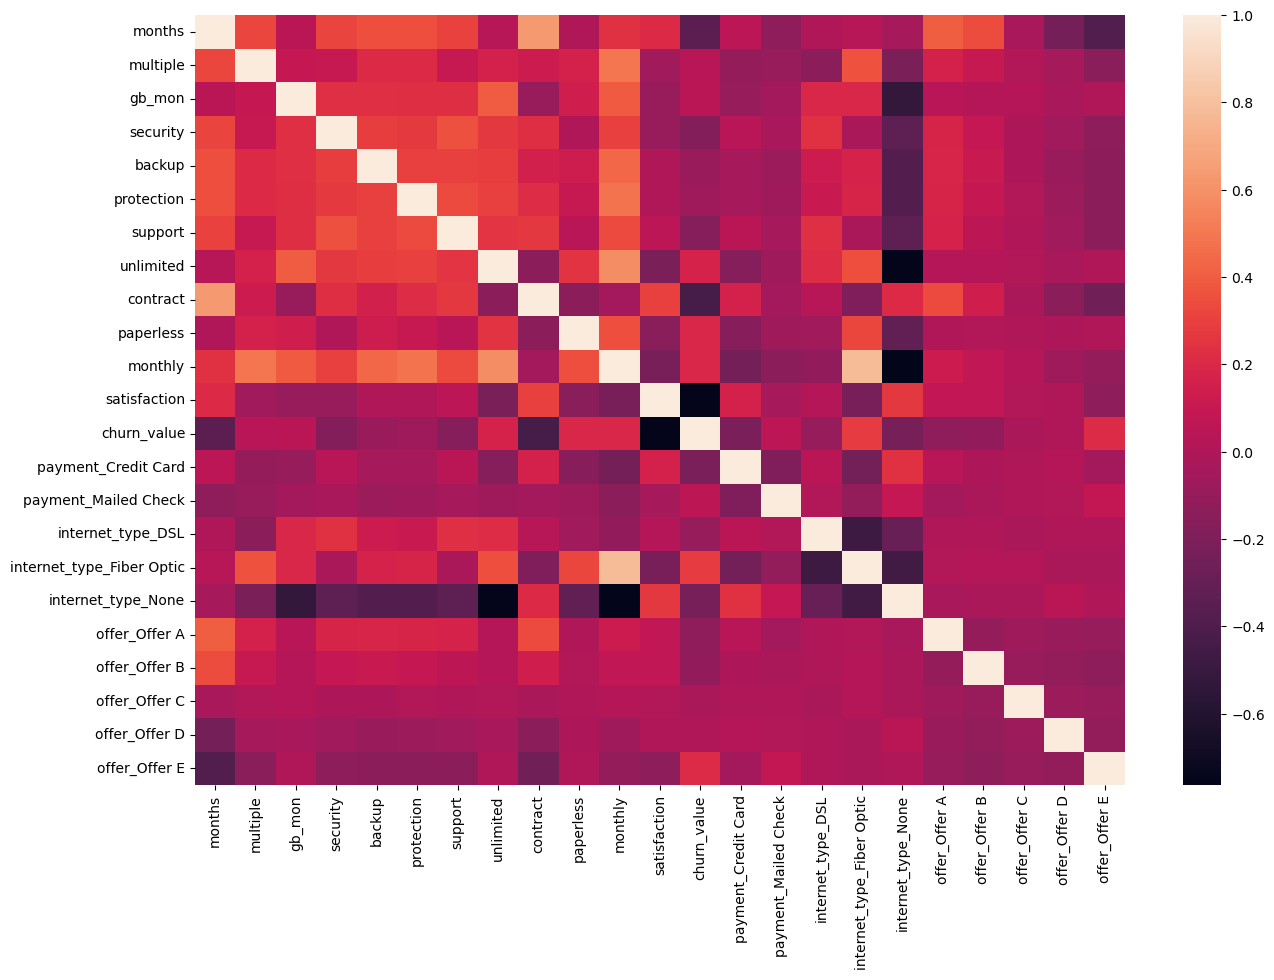

In [8]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data.corr())

<h2 id="TargPreproc">Part 2: Examining the Target and Preprocessing</h2>

In this exercise, we will proceed as follows:

*   Examine distribution of the predicted variable (`churn_value`).
*   Split the data into train and test sets. Decide if a stratified split should be used or not based on the distribution.
*   Examine the distribution of the predictor variable in the train and test data.


In [9]:
# Data are skewed at ~85% towards non-churned customers
# This will be important to remember when model building
target = 'churn_value'
data[target].value_counts()

churn_value
0    5174
1    1869
Name: count, dtype: int64

In [10]:
data[target].value_counts(normalize=True)

churn_value
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Given the skew in the predictor variable, let's split the data with the *churned* values being stratified to ensure that the test and train sets have similar distributions.


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit


feature_cols = [x for x in data.columns if x != target]


# Split the data into two parts with 1500 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1500, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data[target]))

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, target]

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, target]

Let's check the distributions:


In [12]:
y_train.value_counts(normalize=True)

churn_value
0    0.73462
1    0.26538
Name: proportion, dtype: float64

In [13]:
y_test.value_counts(normalize=True)

churn_value
0    0.734667
1    0.265333
Name: proportion, dtype: float64

<h2 id ="OOB">Part 3: Random Forest and Out-of-bag(oob) Error</h2>

In this exercise, we will:

*   Fit random forest models with a range of tree numbers and evaluate the out-of-bag error for each of these models.
*   Plot the resulting oob errors as a function of the number of trees.

*Note:* since the only thing changing is the number of trees, the `warm_start` flag can be used so that the model just adds more trees to the existing model each time. Use the `set_params` method to update the number of trees.


In [14]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.055566
20.0,0.052138
30.0,0.049973
40.0,0.048890
50.0,0.049071
100.0,0.047447
150.0,0.046726
200.0,0.047447
300.0,0.047988


The error looks like it has stabilized around 100-150 trees.


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

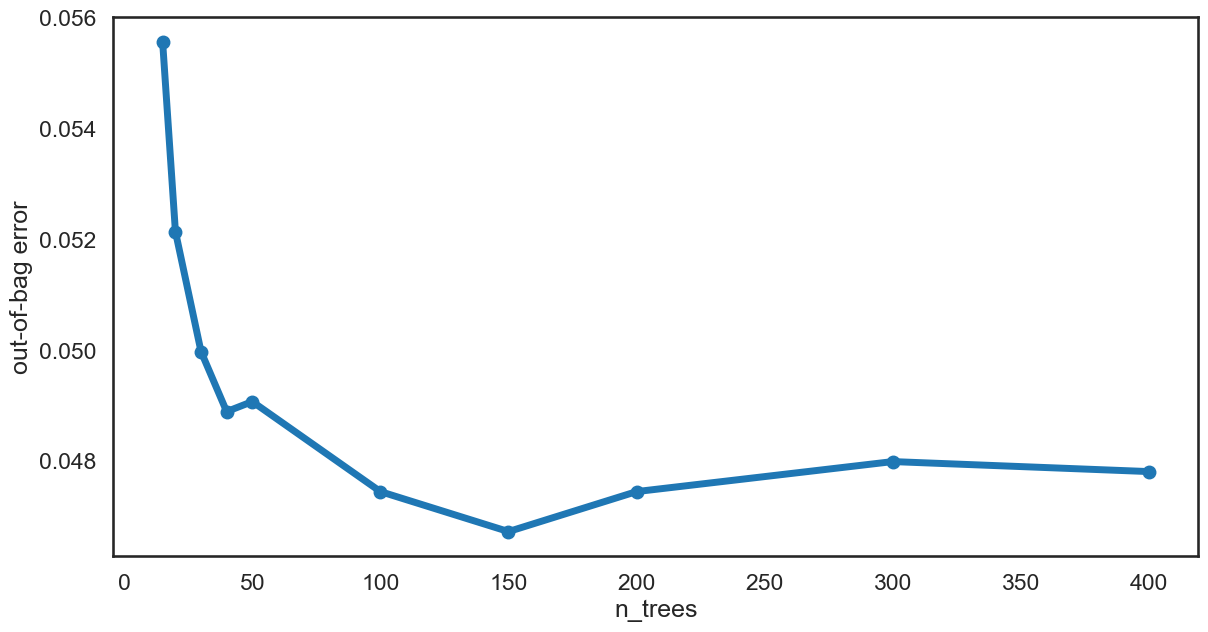

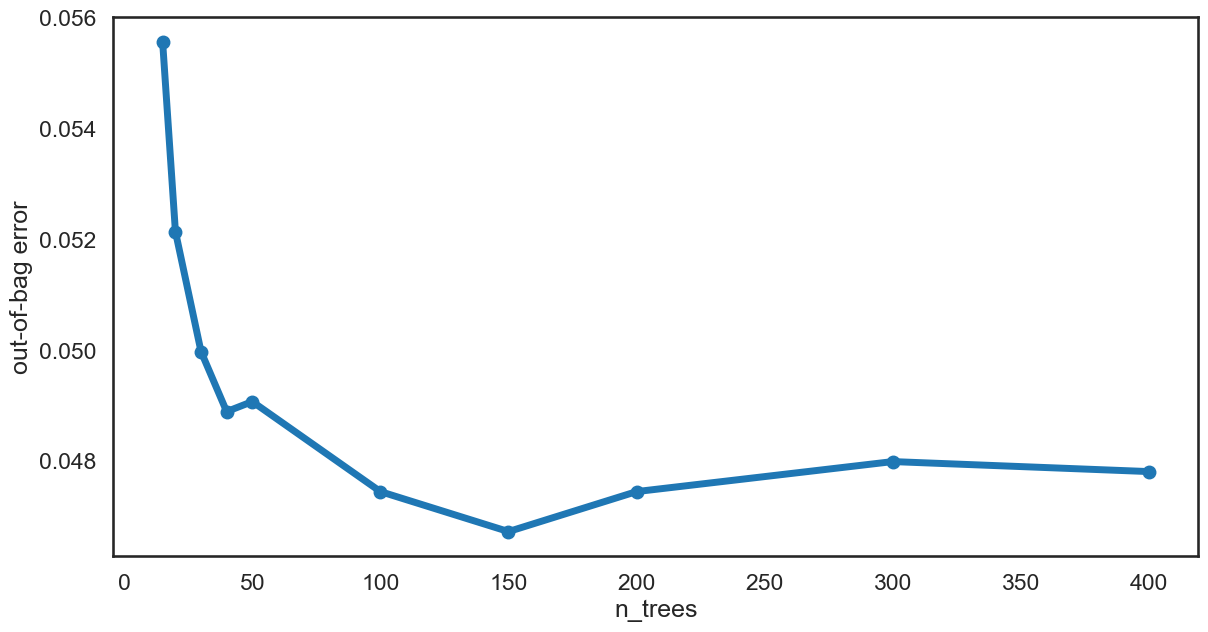

In [25]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');
plt.show()

<h2 id = "ExtraTrees">Part 4: Extra Trees</h2>

Our exercise:

*   Repeat question 3 using extra randomized trees (`ExtraTreesClassifier`). Note that the `bootstrap` parameter will have to be set to `True` for this model.
*   Compare the out-of-bag errors for the two different types of models.


In [26]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.066570
20.0,0.063864
30.0,0.057550
40.0,0.053942
50.0,0.052318
100.0,0.051236
150.0,0.048890
200.0,0.048530
300.0,0.049612


Combine the two dataframes into a single one for easier plotting.


In [27]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.055566,0.066570
20.0,0.052138,0.063864
30.0,0.049973,0.057550
40.0,0.048890,0.053942
50.0,0.049071,0.052318
100.0,0.047447,0.051236
150.0,0.046726,0.048890
200.0,0.047447,0.048530
300.0,0.047988,0.049612


The random forest model performs consistently better than the extra randomized trees.


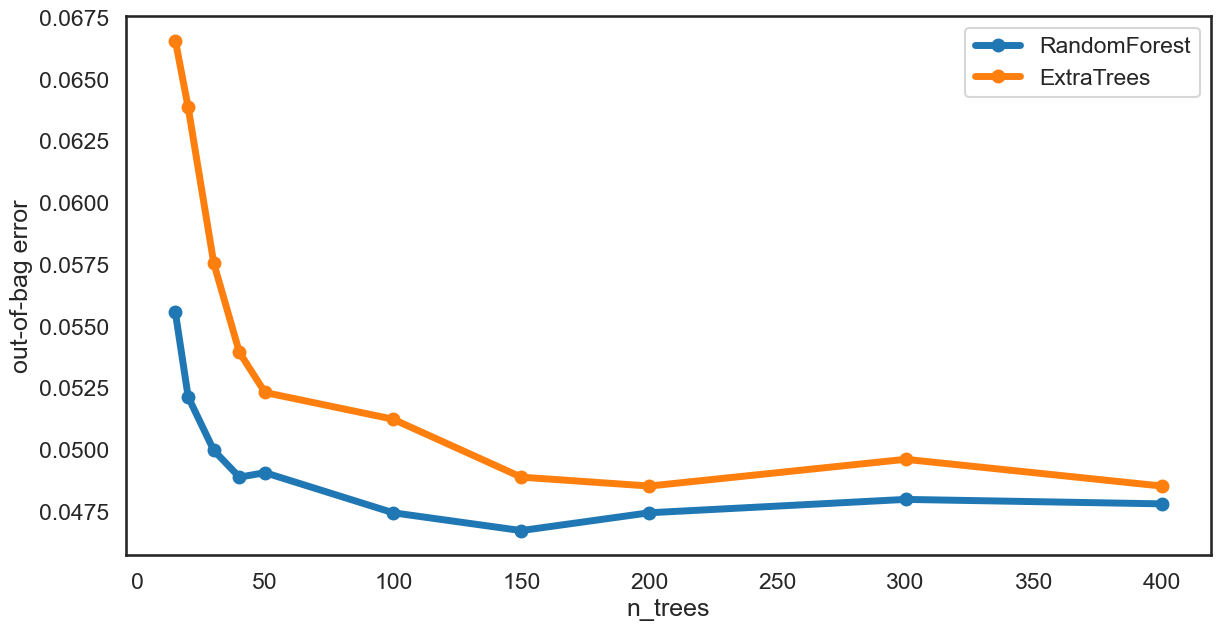

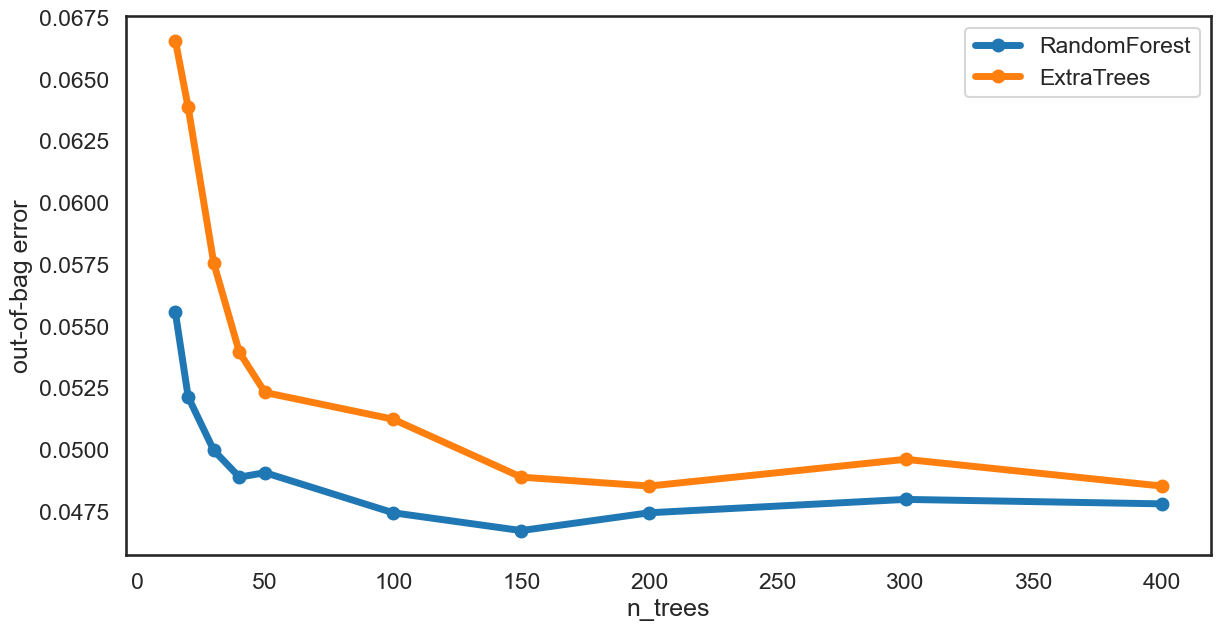

In [29]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');
plt.show()

<h2 id="results">Part 5: Gathering Results</h2>

Here, we will:

*   Select one of the models that performs well and calculate error metrics and a confusion matrix on the test data set.
*   Given the distribution of the predicted class, which metric is most important? Which could be deceiving?


In [30]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

Unsurprisingly, recall is rather poor for the customers who churned (True) class since they are quite small. We are doing better than random guessing, though, as the accuracy is 0.94 (vs 0.85 for random guessing).


In [31]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1102
           1       0.94      0.83      0.88       398

    accuracy                           0.94      1500
   macro avg       0.94      0.90      0.92      1500
weighted avg       0.94      0.94      0.94      1500

   accuracy  precision    recall    f1       auc
0      0.94     0.9375  0.829146  0.88  0.904591


<h2 id="examineRes">Part 6: Examining Results</h2>

The following exercises will help us examine results:

*   Print or visualize the confusion matrix.
*   Plot the ROC-AUC and precision-recall curves.
*   Plot the feature importances.


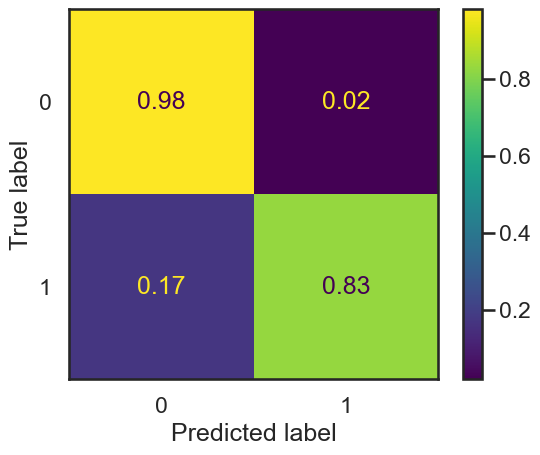

In [32]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix,ConfusionMatrixDisplay

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

The ROC-AUC and precision-recall curves.


In [33]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

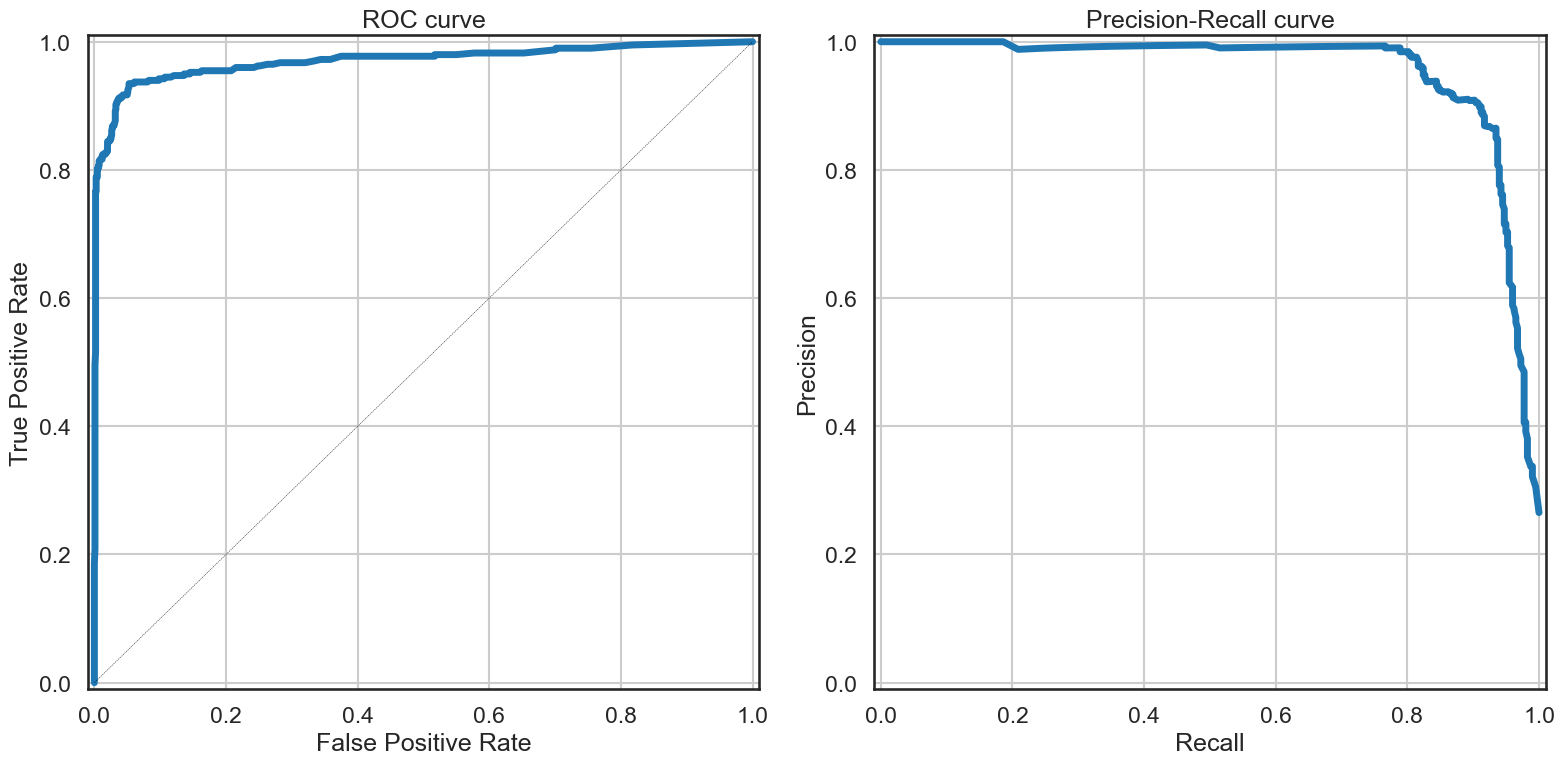

In [34]:
plt.show()

Now, let's look into the importance of features. Apparently, "satisfaction" is the most significant predictor of customer churn.


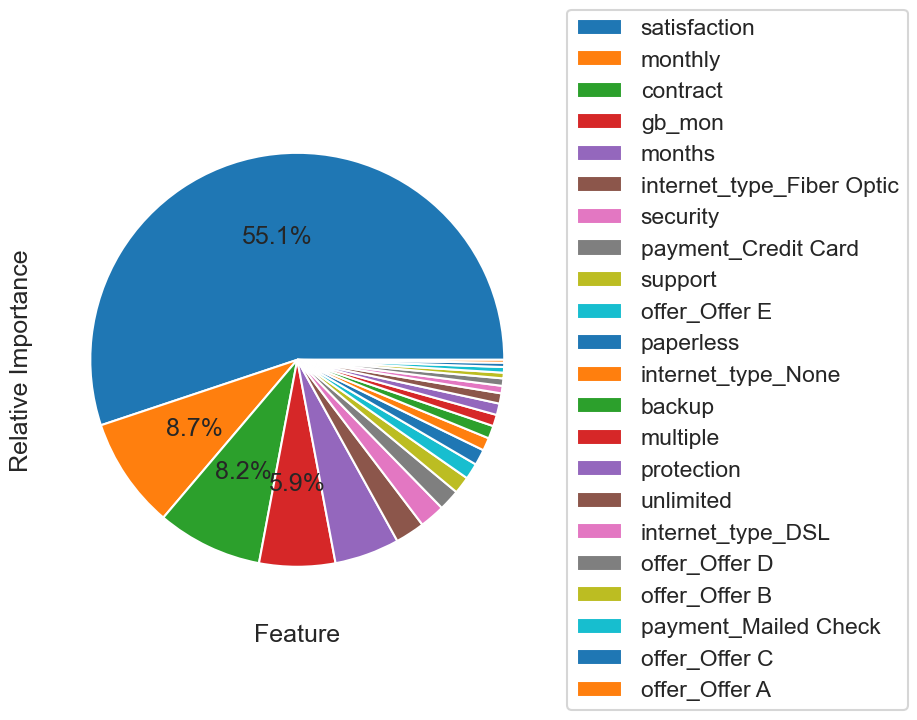

In [35]:
feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16, 6))
ax.pie(feature_imp, labels=None, autopct=lambda pct: '{:1.1f}%'.format(pct) if pct > 5.5 else '')
ax.set(ylabel='Relative Importance')
ax.set(xlabel='Feature')

# Adjust the layout to prevent label overlapping
plt.tight_layout()

# Move the legend outside the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),labels=feature_imp.index)

plt.show()

### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/richard-ye/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Richard Ye</a>


### Machine Learning Foundation (C) 2020 IBM Corporation

<!--## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description |
| ----------------- | ------- | ---------- | ------------------ |
| 2022-01-27        | 0.1     | Joseph Santarcangelo | Created Lab Template |
| 2022-05-02        | 0.2     | Richard Ye | Added in estimated time, objectives and table of contents |--!>


